## Import the libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as data

In [3]:
start = '2000-01-01'
end = '2022-01-01'

df = data.DataReader('MSFT','yahoo',start,end)
df.head()


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1999-12-31,58.8750,58.1250,58.75000,58.37500,12517600.0,36.886784
2000-01-03,59.3125,56.0000,58.68750,58.28125,53228400.0,36.827522
2000-01-04,58.5625,56.1250,56.78125,56.31250,54119000.0,35.583492
2000-01-05,58.1875,54.6875,55.56250,56.90625,64059600.0,35.958683
2000-01-06,56.9375,54.1875,56.09375,55.00000,54976600.0,34.754116


In [4]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-12-27,342.480011,335.429993,335.459991,342.450012,19947000.0,341.743378
2021-12-28,343.809998,340.320007,343.149994,341.250000,15661500.0,340.545837
2021-12-29,344.299988,339.679993,341.299988,341.950012,15042000.0,341.244415
2021-12-30,343.130005,338.820007,341.910004,339.320007,15994500.0,338.619843
2021-12-31,339.359985,335.850006,338.510010,336.320007,18000800.0,335.626038


In [5]:
df = df.reset_index()

In [6]:
df

,Date,High,Low,Open,Close,Volume,Adj Close
0,1999-12-31,58.875000,58.125000,58.750000,58.375000,12517600.0,36.886784
1,2000-01-03,59.312500,56.000000,58.687500,58.281250,53228400.0,36.827522
2,2000-01-04,58.562500,56.125000,56.781250,56.312500,54119000.0,35.583492
3,2000-01-05,58.187500,54.687500,55.562500,56.906250,64059600.0,35.958683
4,2000-01-06,56.937500,54.187500,56.093750,55.000000,54976600.0,34.754116
...,...,...,...,...,...,...,...
5532,2021-12-27,342.480011,335.429993,335.459991,342.450012,19947000.0,341.743378
5533,2021-12-28,343.809998,340.320007,343.149994,341.250000,15661500.0,340.545837
5534,2021-12-29,344.299988,339.679993,341.299988,341.950012,15042000.0,341.244415
5535,2021-12-30,343.130005,338.820007,341.910004,339.320007,15994500.0,338.619843


In [10]:
df.drop(['Date','Adj Close'],axis = 1,inplace = True)

In [11]:
df.head()

,High,Low,Open,Close,Volume
0,58.8750,58.1250,58.75000,58.37500,12517600.0
1,59.3125,56.0000,58.68750,58.28125,53228400.0
2,58.5625,56.1250,56.78125,56.31250,54119000.0
3,58.1875,54.6875,55.56250,56.90625,64059600.0
4,56.9375,54.1875,56.09375,55.00000,54976600.0


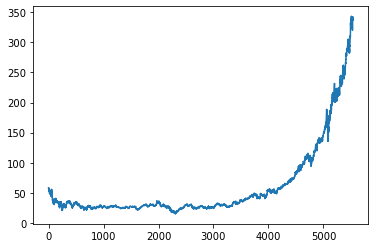

In [12]:
plt.plot(df.Close)

In [13]:
ma100 = df.Close.rolling(100).mean()

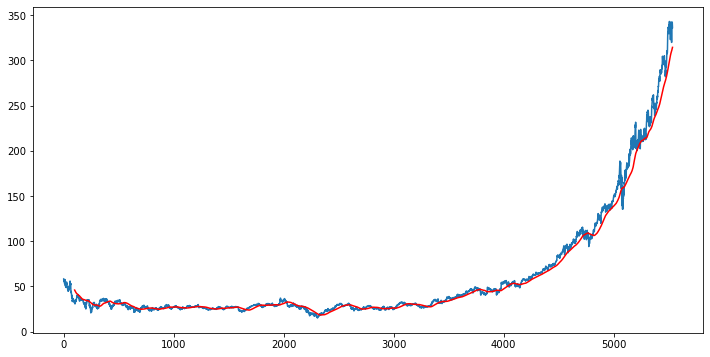

In [14]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [15]:
ma200 = df.Close.rolling(200).mean()
ma200

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
5532    285.3813
5533    285.9135
5534    286.4347
5535    286.9461
5536    287.4741
Name: Close, Length: 5537, dtype: float64

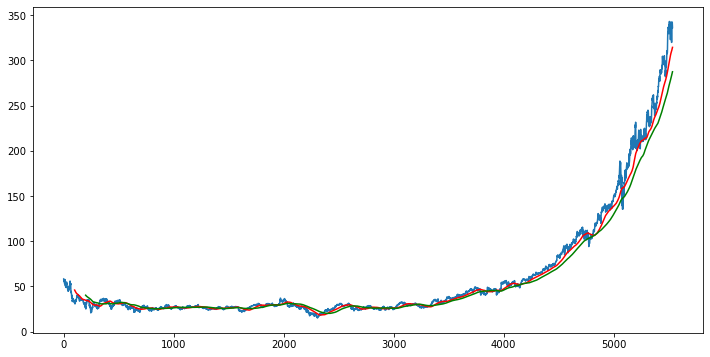

In [16]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [17]:
df.shape

(5537, 5)

## Split the data into Train and Test

In [21]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(3875, 1)
(1662, 1)


In [22]:
data_training.head()

,Close
0,58.37500
1,58.28125
2,56.31250
3,56.90625
4,55.00000


In [23]:
data_testing.head()

,Close
3875,46.860001
3876,47.230000
3877,46.919998
3878,46.849998
3879,46.360001


## Scale the Data

In [24]:
from sklearn.preprocessing import MinMaxScaler

In [25]:
scaler = MinMaxScaler(feature_range=(0,1))


In [26]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[1.        ],
       [0.99783112],
       [0.95228456],
       ...,
       [0.72735686],
       [0.75095433],
       [0.74725277]])

In [27]:
data_training_array.shape

(3875, 1)

## ML Model

In [54]:
from keras.layers import Dense,Dropout, LSTM
from keras.models import Sequential

In [55]:
model = Sequential()
model.add(LSTM(units = 50,activation = 'relu',return_sequences = True,input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60,activation = 'relu',return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80,activation = 'relu',return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120,activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [56]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [57]:
model.compile(optimizer= 'adam',loss = 'mean_squared_error')
model.fit(x_train,y_train,epochs = 50)

Epoch 1/50
118/118 [==============================] - 65s 431ms/step - loss: 0.0146
Epoch 2/50
118/118 [==============================] - 41s 350ms/step - loss: 0.0044
Epoch 3/50
118/118 [==============================] - 50s 427ms/step - loss: 0.0040
Epoch 4/50
118/118 [==============================] - 41s 344ms/step - loss: 0.0034
Epoch 5/50
118/118 [==============================] - 33s 279ms/step - loss: 0.0032
Epoch 6/50
118/118 [==============================] - 35s 298ms/step - loss: 0.0028
Epoch 7/50
118/118 [==============================] - 42s 356ms/step - loss: 0.0026
Epoch 8/50
118/118 [==============================] - 39s 324ms/step - loss: 0.0023
Epoch 9/50
118/118 [==============================] - 36s 304ms/step - loss: 0.0022
Epoch 10/50
118/118 [==============================] - 35s 298ms/step - loss: 0.0021
Epoch 11/50
118/118 [==============================] - 37s 313ms/step - loss: 0.0019
Epoch 12/50
118/118 [==============================] - 36s 308ms/step - lo

In [58]:
model.save('keras_model.h5')

In [60]:
data_testing.head()

,Close
3875,46.860001
3876,47.230000
3877,46.919998
3878,46.849998
3879,46.360001


In [61]:
past_100days = data_training.tail(100)

In [64]:
final_df = past_100days.append(data_testing,ignore_index = True)

C:\Users\shyam suthar\AppData\Local\Temp\ipykernel_15184\3923956722.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100days.append(data_testing,ignore_index = True)


In [65]:
final_df.head()

,Close
0,46.330002
1,45.650002
2,46.230000
3,47.590000
4,47.189999


In [66]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.01994585],
       [0.01770029],
       [0.01961561],
       ...,
       [0.99616943],
       [0.98748439],
       [0.97757751]])

In [67]:
input_data.shape

(1762, 1)

In [69]:
x_test = []
y_test = []

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [70]:
x_test,y_test = np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1662, 100, 1)
(1662,)


In [71]:
y_predicted = model.predict(x_test)

In [72]:
y_predicted.shape

(1662, 1)

In [73]:
y_test

array([0.02169606, 0.0229179 , 0.02189419, ..., 0.99616943, 0.98748439,
       0.97757751])

In [74]:
y_predicted

array([[0.08962707],
       [0.08960679],
       [0.08954842],
       ...,
       [0.86019504],
       [0.8629633 ],
       [0.863062  ]], dtype=float32)

In [75]:
scaler.scale_

array([0.00330229])

In [76]:
scaler_factor = 1/0.00330229
y_predicted = y_predicted * scaler_factor
y_test = y_test * scaler_factor

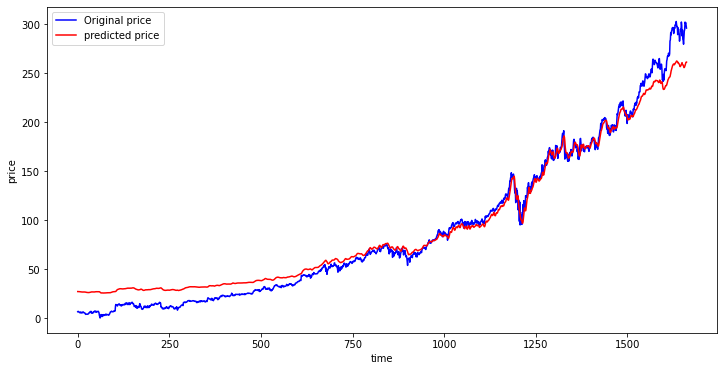

In [77]:
plt.figure(figsize = (12,6))
plt.plot(y_test,'b',label = 'Original price')
plt.plot(y_predicted, 'r', label = 'predicted price')
plt.xlabel('time')
plt.ylabel('price')
plt.legend()
plt.show()